## Quick Machine Learning
### Part. 1 Supervised Learning Techniques
- Decision Tree
- Cross-Validation
- Naive Bayes
- K-Nearest Neighbours
- Random Forest
- Ensemble Methods

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="ticks")
from sklearn.feature_extraction.text import CountVectorizer
from skimage.io import imread, imshow

### Exploratory Data
- Feature Aggregation: combining features to make new features.
- Feature Selection: removing irrelevant features.
- Feature Transformation: mathematical transformations, e.g. sqr, exp, log.
    - Discretization: numerical data -> categorical data e.g. age into age group.
- Summary Statistics:
    - Categorical: frequency of classes, modes, quantiles.
    - Continuous: mean, median, quantiles.
    - Entropy: $\sum_{c=1}^{k} p_{c}\log {p_{c}}$ measures randomness in range 0 to $\log k$. Lower means predictable, higher means random. Highest entropy in categorical and continuous distributions are the uniform and normal distributions respectively.
    - x, y: hamming distance, euclidian distance, correlation, and rank correlation.
    - Jaccard Coefficient: distance between sets. Intersection over union.
    - Edit Distance: distance between strings.

In [2]:
# Show different types of data
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
# Show bag of words
text = "The University of British Columbia (UBC) is a public research university with campuses and facilities in British Columbia, Canada."
cv = CountVectorizer()
feat = cv.fit_transform([text])
for word, idx in cv.vocabulary_.items():
    print("%-14s%d" % (word, feat[0,idx]))

the           1
university    2
of            1
british       2
columbia      2
ubc           1
is            1
public        1
research      1
with          1
campuses      1
and           1
facilities    1
in            1
canada        1


In [4]:
# Discretization
ages = pd.cut(titanic['age'], bins=(0,20,30,100))
ages_cat = pd.get_dummies(ages)
pd.concat([titanic['age'], ages_cat],axis=1).head()

,age,"(0, 20]","(20, 30]","(30, 100]"
0,22.0,0,1,0
1,38.0,0,0,1
2,26.0,0,1,0
3,35.0,0,0,1
4,35.0,0,0,1


### Decision Tree Learning
- Decision trees are nested if-else splitting rules that returns a class label at the end of each sequence.
- Decision stumps have only 1 rule based on only 1 feature.
- Decision tress allow sequences of splits based on multiple features. It's computationally infeasible to find the best decision tree.
- Most commonly used: **Greedy Recursive Splitting**
    - With full dataset, split to two smaller datasets based on stump
    - Fit a decision stump to each leaf's data, add stumps to the tree.
- Score: **Information Gain**
    - entropy of labels before split - number of examples satisfying rule * entropy of labels for examples satisfying rule - number of examples NOT satisfying rule * entropy of labels for examples NOT satisfying rule
    - $I = entropy(y) - \frac {n_{yes}}{n} entropy(y_{yes}) - \frac {n_{no}}{n} entropy(y_{no})$
    - information gain for baseline rule is 0
    - classification accuracy should gradually increase with depth
    

In [5]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

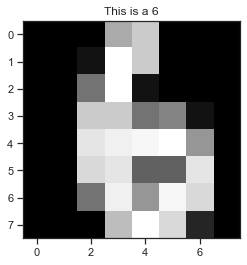

In [6]:
digits = datasets.load_digits()
X, y = digits['data'], digits['target']
n, d = X.shape
idx = np.random.randint(0, n) 
plt.imshow(digits['images'][idx], cmap='Greys_r')
plt.title('This is a %d' % digits['target'][idx]);

In [7]:
# Depth 1 Decision Tree
stump = DecisionTreeClassifier(max_depth=1)
stump.fit(X,y)
yhat = stump.predict(X)
print("Error rate:", np.sum(y!=yhat)/n) # or np.mean(y!=yhat)

Error rate: 0.80189204229271


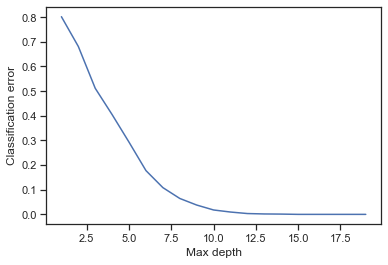

In [8]:
# Plot classification error with increasing depth
errors = []
depths = range(1,20)
for max_depth in depths:
    tree = DecisionTreeClassifier(max_depth=max_depth)
    tree.fit(X,y)
    yhat = tree.predict(X)
    errors.append(np.mean(y!=yhat))
plt.plot(depths, errors)
plt.xlabel("Max depth")
plt.ylabel("Classification error");

### Fundamentals of Learning
- Overfitting: testing accuracy is lower than training accuracy.
- Supervised learning steps: training phase -> testing phase. 
    - Test data cannot influence training phase in any way.
    - Training and testing data are assumed to be IID across examples but not across features.
- **Learning Theory**: how does $E_{train}$ training data relate to $E_{test}$ test error. Testing error is what we care.
- **Fundamental Trade-Off**: 
    - $E_{test}=(E_{test}-E_{train})+E_{train}$
    - test error = approximation error + training error
    - $E_{approx}$ is the amount of overfitting, decreases when n increases or model complexity increases. 
    - Small $E_{approx}$ implies $E_{train}$ is a good approximation to $E_{test}$.
    - Trade off of how small you can make $E_{train}$ vs. how well $E_{train}$ approximates $E_{test}$. Simple models like decision stumps have low $E_{approx}$ but high $E_{train}$. Complex models like deep decision tress have low $E_{train}$ but high $E_{approx}$.
- **Validation Error**: split training examples to training set and validation set biased approximation of test error.
    - $E[E_{valid}] = E[E_{test}]$
- Parameters control how well we fit a dataset, find by training, e.g. decision tree rules.
- Hyper-parameters control how complex the model is, cannot train but can validate using score, e.g. decision tree depth.
- **Optimization Bias**: aka overfitting. Grows with complexity of the set of models we search for but shrinks with the number of examples.
    - Parameter learning: search decision trees, find low training error by chance.
    - Hyper-parameter tuning: optimize validation error, find low error by chance.


In [9]:
# Optimization bias
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.2)
tree = DecisionTreeClassifier(max_depth=20)
tree.fit(Xtrain,ytrain)
train_err = np.mean(ytrain!=tree.predict(Xtrain))
print("Training error,", train_err)
test_err = np.mean(ytest!=tree.predict(Xtest))
print("Test error,", test_err)

Training error, 0.0
Test error, 0.15833333333333333


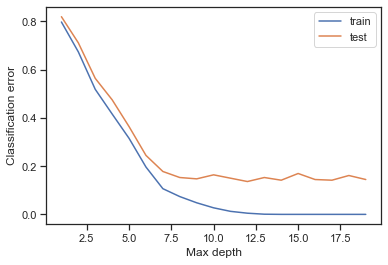

In [10]:
# Plot difference between training and testing error
train_errors = []
test_errors = []
for max_depth in depths:
    tree = DecisionTreeClassifier(max_depth=max_depth)
    tree.fit(Xtrain,ytrain)
    train_errors.append(np.mean(ytrain!=tree.predict(Xtrain)))
    test_errors.append(np.mean(ytest!=tree.predict(Xtest)))
plt.plot(depths, train_errors, label="train")
plt.plot(depths, test_errors, label="test")
plt.xlabel("Max depth")
plt.ylabel("Classification error")
plt.legend()

### Probabilistic Classification
- Validation error usually has lower optimization bias than training error. Overfitting validation error happens when calculating the error a huge number of times.
- Optimization bias is small when compare a few models, large when compare a lot of models. Bias also shrinks with increasing validation set size.
- **k-Fold Cross-Validation**: more accurate and expensive with more folds.
    - To choose depth: for depths 1 to 20, compute the cross-validation score and return the highest score.
    - To compute the score: for fold 1 to 5, training 80% that doesn't include the fold, lastly return average test score.
- Spam Filtering with supervised learning: collect spam-labeled dataset, extract features (e.g. bag of words, bi/trigrams, regex), classify by **naive Bayes**.
    - $p(y_{i}="spam"|x_{i})= \frac {p(x_{i}|y_{i}="spam") p(y_{i}="spam") }{p(x_{i})} $
    - $p(y_{i}="spam") = \frac {spam\ messages}{total\ messages} $ 
    - $p(x_{i}) = \frac {e-mails\ with\ features\ x_{i}}{total\ e-mails}$, hard to estimate ignore now.
    - $p(x_{i}|y_{i}="spam")= \frac {spam\ messages\ with\ features\ x_{i}}{spam\ messages}$
    - Naive Bayes assumes all features are conditionally independent given label $y_{i}$.

### Non-Parametric Models
- **Laplace Smoothing**: add 1 to numerator, add 2 to denominator. This is used when $p(x_{i}|y_{i}="spam")=0$ to avoid automatically getting through. This is done across all features to avoid overfitting by biasing towards uniform distribution. A common variation is to use $\beta\ , \beta k$ instead of 1, 2.
- **Decision Theory**: do false positive and false negative carry the same weight? We give cost to each scenario, where we minimize expected cost.
    - $cost = E[cost(\hat{y_{i}} , \tilde{y_{i}} )]$
    - cost = expectation of cost of predicting $\hat{y_{i}}$ if it's really $\tilde{y_{i}}$ with respect to $\tilde{y_{i}}$
- **k-Nearest Neighbours**: find the k training examples $x_{i}$ nearest to $\tilde{x_{i}}$, classify using most common label of nearest training examples.
    - kNN assumes examples with similar features are likely to have similar labels.
    - Common distance function: Euclidean, O(d) to compute.
    - As k grows, training error increases and approximation error decreases.
    - No training phase in KNN. Predictions are expensive O(nd). Storage is expensive O(nd).
    - Have good consistency properties. Test error is less than twice best possible error.
- Parametric Models: fixed number of parameters.
    - e.g. naive Bayes stores counts, fixed-depth decision tree store rules. 
    - Estimation improves with more data unless model is too simple. 
    - Memory is bounded.
    - Accuracy limit exists. Infinite n may not be able to acheive optimal error.
- Non-parametric Models: number of parameters grows with n.
    - e.g. KNN stores all training data, decision tree whose depth grows with number of examples. 
    - Complexity grows with more data.
    - Memory is unbounded
    - Converges to optimal error.
- Curse of Dimensionality: volume of space grows exponentially with dimension, need exponentially more points to fill a high-dimensional volume.

In [11]:
from sklearn.neighbors import  KNeighborsClassifier

In [12]:
# code adapted from http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html
def plotClassifier(model, X, y, transformation=None):
    x1 = X[:, 0]
    x2 = X[:, 1]
    
    x1_min, x1_max = int(x1.min()) - 1, int(x1.max()) + 1
    x2_min, x2_max = int(x2.min()) - 1, int(x2.max()) + 1

    x1_line =  np.linspace(x1_min, x1_max,200)
    x2_line =  np.linspace(x2_min, x2_max,200)

    x1_mesh, x2_mesh = np.meshgrid(x1_line, x2_line)

    mesh_data = np.c_[x1_mesh.ravel(), x2_mesh.ravel()]
    
    if transformation is not None:
        mesh_data = transformation(mesh_data)
    y_pred = model.predict(mesh_data)
    y_pred = np.reshape(y_pred, x1_mesh.shape)

    plt.xlim([x1_mesh.min(), x1_mesh.max()])
    plt.ylim([x2_mesh.min(), x2_mesh.max()])

    plt.contourf(x1_mesh, x2_mesh, -y_pred, cmap=plt.cm.RdBu, alpha=0.6)

    plt.scatter(x1[y<0], x2[y<0], color="b", marker="x", label="class $-1$")
    plt.scatter(x1[y>0], x2[y>0], color="r", marker="o", label="class $+1$")
    plt.legend(loc="best")
    plt.tick_params(axis='both', which='both', bottom='off', left='off', labelbottom='off', labelleft='off')

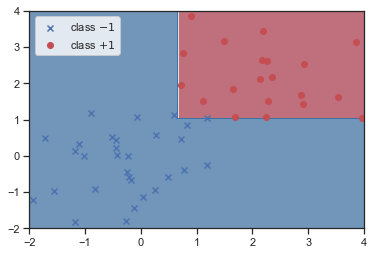

In [13]:
# Make random dataset
N = 50
X = np.random.randn(N,2)
y = np.random.choice((-1,+1),size=N)
X[y>0,0] += 2
X[y>0,1] += 2

dt = DecisionTreeClassifier()
dt.fit(X,y)
plotClassifier(dt, X, y)

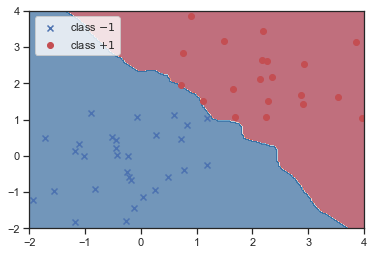

In [14]:
nn = KNeighborsClassifier(n_neighbors=10)
nn.fit(X,y)
plotClassifier(nn, X, y)

### Ensemble Methods
- Common way to define distace: take the "norm" of the difference between feature vectors. Norms are a way to measure the length of a vector. Different norms places different weights on differences. In L2, bigger differences are important. In L1, differences are equally notable. In Linf, only biggest differnce is important.
    - L2-Norm (Euclidean norm): $||x_{i}-\tilde{x_{\tilde{i}}}||_{2} = \sqrt{\sum_{j=1}^{d}(x_{i,j}-\tilde{x_{\tilde{i,j}}})^{2}} $ which is ||Train example - Test-Example||.
    - L1-Norm: $||r||_{1} = \sum_{j=1}^{d}|r_{j}|$
    - L$_{\infty}$-Norm: $max_{j}{|r_{j}|} $
- Optical Character Recognition:
    - KNN doesn't know labels should be translation invariant. Add transformed data during training to fix.
- Ensemble Methods: meta-classifier having input classifiers.
    - Averaging: input is predictions of a set of models and take the mode of predictions.
    - Stacking: fit another classifier that uses predictions from models.
    - Random Forests: average a set of deep decision trees using bootstrapping and random trees, usually predictions are fast. First, bootstrap sample of list of n samples. Second, perform bagging by fitting classifier to each bootstrap sample, at test time average the predictions. Third, for each split in a random tree model, randomly sample a small number of features and only consider them when searching for optimal rule. Splits will use different features in different trees, but will still overfit and errors will be more independent, so average tends to have a much lower test error. 

In [15]:
from sklearn.ensemble import RandomForestClassifier

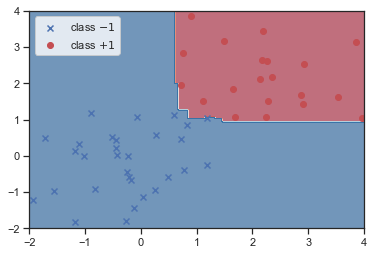

In [16]:
rf = RandomForestClassifier(n_estimators=50)
rf.fit(X,y)
plotClassifier(rf, X, y)

In [17]:
import sklearn.datasets
# load the newsgroups data
train = sklearn.datasets.fetch_20newsgroups_vectorized(subset='train')
X_train = train.data
y_train = train.target

test = sklearn.datasets.fetch_20newsgroups_vectorized(subset='test')
X_test = test.data
y_test = test.target

def print_errs(model):
    train_err = 1-model.score(X_train, y_train)
    test_err  = 1-model.score(X_test,  y_test)

    print("Train error:", train_err)
    print("Test  error:", test_err)

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
print("Decision Tree")
print_errs(dt)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print("Random Forest")
print_errs(rf)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print("K-Nearest Neighbours")
print_errs(knn)

Decision Tree
Train error: 8.838607035532853e-05
Test  error: 0.4419808815719597
Random Forest
Train error: 8.838607035532853e-05
Test  error: 0.24946893255443436
K-Nearest Neighbours
Train error: 0.20867951210889168
Test  error: 0.5916091343600638


In [18]:
from sklearn.ensemble import VotingClassifier

classifiers = {
    "decision tree" : dt,
    "random forest" : rf,
    "KNN"           : knn
}

ensemble = VotingClassifier(classifiers.items())
ensemble.fit(X_train, y_train)
print_errs(ensemble)

Train error: 0.00017677214071065706
Test  error: 0.31346255974508763


### Part. 2 Unsupervised Learning Techniques
- K-means
- DBscan
- Agglomerative Clustering
- Outlier Detection
- A Priori Algorithm

### Clustering
- Clustering: same group should be similar, different groups should be different. There are no test errors.
- **k-Means**: input is hyper-parameter $k$ number of clusters and initial guess of the mean of each cluster. 
    - Assign each $x_{i}$ to closest mean, update the means, and repeat until convergence.
    - Objective is to total sum of squared distanced from each example $x$ to its center $w$:  $f(w_{1},w_{2}...w_{k},\hat{y_{1}},\hat{y_{2}}...\hat{y_{n}}) = \sum_{i=1}^{n}||w_{\hat{y_{i}}}-x_{i}||^{2}$
    - Minimize f in terms of $\hat{y_{i}}$ to update cluster assignment then minimize in terms of $w_{c}$ to update means.
    - Total cost is $O(ndk)$
    - If use L1-norm instead, use k-medians. If we need actual data points as means, use k-medoids. Newer appproach is k-means++.
- Random restarts deals with sensitivity to initialization.
- Vector quanitization is to compress examples by replacing them with the mean of their cluster.
- Issue with k-means is its cannot seperate non-convex shapes of clusters, solve by density-based clustering.
- **DBscan**: input is 2 hyper-parameters $\epsilon$ distance to decide if neighbours, $MinNeighbours$ to decide number of neighbors to define dense / a core point.
    - For each example $x_{i}$: if assigned to cluster do nothing, test whether is a core point, if false do nothing, if true make a new cluster and call the "expand cluster" function.
    - Expand cluster: assign to cluster all $x_{j}$ within $\epsilon$ of core point $x_{i}$ to this cluster. For each new core point found, expand cluster. 
    - Choosing hyper-parameters using elbow method.
- Ensemble clustering combines multiple clustering, but take not of label switching.
- **Hierarchical Clustering**: produces tree of clusterings. Each node in the tree splits data into >=2 clusters. Individual data points are leaves.
    - **Agglomerative Clustering**: start with each point in a cluster, merge closest pair of cluster, stop at one big cluster.
    - Closest is defined as distance between means of clusters.
    - Cost is $O(n^{3}d)$
- Biclustering: cluster training examples and features. X is plotted as a heatmap, where rows/columns arranged by clusters. Breast cancer visualization is common using hierarchical biclustering + heatmap + dendograms.

In [19]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics.pairwise import euclidean_distances

In [20]:
def plot_clust(X,W=None,z=None):
    if z is not None:
        if np.any(z<0):
            plt.scatter(X[z<0,0], X[z<0,1], marker="o", facecolors='none', edgecolor='black', alpha=0.3);
        if np.any(z>=0):
            plt.scatter(X[z>=0,0], X[z>=0,1], marker="o", c=z[z>=0], alpha=0.3);
    else:
        plt.scatter(X[:,0], X[:,1], marker="o", c='black', alpha=0.3);
    if W is not None:
        plt.scatter(W[:,0], W[:,1], marker="^", s=200, c=np.arange(W.shape[0]));
    else:
        plt.title("number of clusters = %d" % len(set(np.unique(z))-set([-1])));

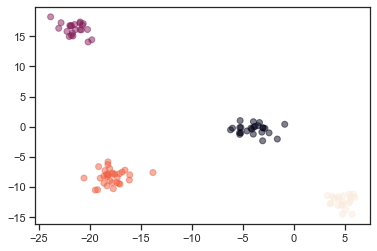

In [22]:
# Make random dataset
np.random.seed(2) 
n = 100
d = 2
k_true = 4
W_true = np.random.randn(k_true,d)*10
z_true = np.random.randint(0,k_true,size=n)
X = np.zeros((n,2))
for i in range(n):
    X[i] = W_true[z_true[i]] + np.random.randn(d)
plt.scatter(X[:,0], X[:,1], c=z_true, marker="o", alpha=0.5);

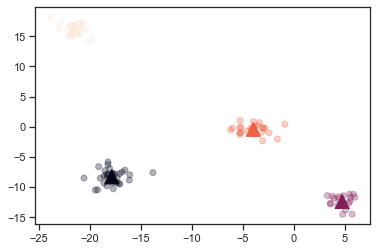

In [23]:
# assign each object to closest mean
def update_z(X,W):
    dist2 = euclidean_distances(X, W)
    return np.argmin(dist2, axis=1)


# recompute cluster centres
def update_W(X,z,W_old):
    # just being a bit careful about the case of a cluster with no points in it
    W = W_old.copy()
    for kk in range(k):
        W[kk] = np.mean(X[z==kk],axis=0)
    return W

# Start k-means by randomly initialize means
k = 4
W = X[np.random.choice(n, k, replace=False)]
# can change to loop until np.all(z_new == z)
for itr in range(100):
    z = update_z(X,W)
    W = update_W(X,z,W)
plot_clust(X,W,z)

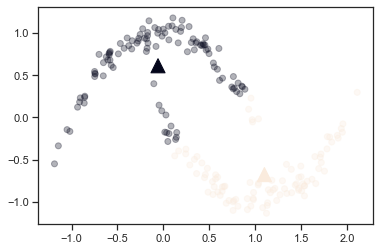

In [27]:
# make non-convex dataset
n1 = 100
x1 = np.linspace(-1,1,n1) + np.random.randn(n1)*.1
y1 = 1-x1**2 + np.random.randn(n1)*.1
n2 = 100
x2 = np.linspace(0,2,n2) + np.random.randn(n2)*.1
y2 = (x2-1)**2-1 + np.random.randn(n2)*.1
x = np.concatenate((x1,x2))
y = np.concatenate((y1,y2))
X = np.concatenate((x[:,None],y[:,None]),axis=1)

# run k-means first, to see problem
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
plot_clust(X,kmeans.cluster_centers_, kmeans.labels_)

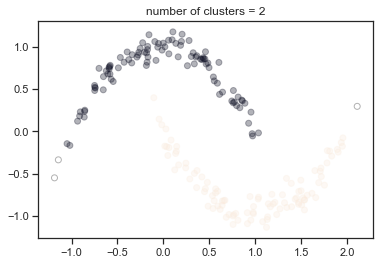

In [28]:
dbscan = DBSCAN(eps=0.3)
dbscan.fit(X)
plot_clust(X,z=dbscan.labels_)

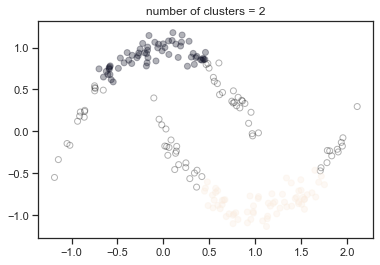

In [29]:
# hyper-parameter alteration
dbscan = DBSCAN(eps=0.3, min_samples=25)
dbscan.fit(X)
plot_clust(X,z=dbscan.labels_)

### Outlier Detection
- Sources: measurement error, data entry erros, contamination of data, rare events (novel genes).
- Model-based OD: fit probabilistic model, outliers are examples with low probability.
    - Data ~ Normal, then z-score is $\frac{x_{i - \mu}}{\sigma}$, number of standard deviations away from mean, assuming uni-modal. Outlier exceed certain threshold, yet z-score sensitive to outliers.
    - We might have a global outlier with a large z-score, but cannot detect local outlier with low z-score.
- Graphical OD:
    - Boxplot one variable at a time
    - Scatterplot/ scatterplot array two variables at a time
    - PCA scatterplot but loses information and sensitive to outliers. 
- Cluster-based OD:
    - K-means to find clusters with few points.
    - DBscan to find points not assigned to cluster.
    - Hierarchical clustering to find outliers/outlier groups taking longer to join other groups.
- Distance-based OD:
    - Global: for each point, compute average distance to KNN, choose points with biggest values as global outliers.
    - Local: if outlierness ratio of i, $\frac{average\ distance\ of\ i\ to\ its\ KNNs}{average\ distance\ neighbors\ of\ i\ to\ its\ KNNs} > 1$, then i is further away from neighbors than expected.
- Supervised-learning OD:
    - Need to know labels and cannot detect new types of outliers.

### Appendix: Finding Similarity
- Amazon Product Recommendation: returns normalized KNN across columns (product as features) by finding j columns minimizing $||x^{i}-x^{j}||$. Cost is $O(nd)$, which enormous.
- Grid-based Pruning: divide space into square of distance $\epsilon$, hash examples based on squares, check points in 8-neighbours. As dimensions increase, this is not feasible.
    - Approximate Nearest Neighbours: use one grid, check points in the same square, use another grid...so on.
- Shingling: divide object into parts, using e.g. n-grams. 
    - Fast exact matching using hashing. Hash key will be the shingle, values will be the training example indexes.
- Support: proportion of examples with all "s" items, e.g. $p(S=1) = \frac{times\ all\ elements\ of\ s\ are\ 1}{n}$
- Frequent itemset: find all sets "S" with p(S=1) >= threshold s. With "d" features there are $2^{d}-1$ sets. 
- A Priori Algorithm:
    - generate list of all sets S that have size = 1
    - set k = 1
    - prune S of size k where p(S=1) < s
    - add all sets of size k+1 that have all subsets of size k in current list
    - set k = k+1 and go to 3.